In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library
import requests

# Import the API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

import time

# Import linear regression from the SciPy stats module
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size = 1500)
longs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats,longs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(13.034612435071097, 83.40838585029445),
 (7.884566441788479, 161.72732275271107),
 (32.932709910866365, -12.396187508437976),
 (70.07213745583135, 55.531133201283495),
 (28.398925825397455, 149.17924855418357),
 (41.435070812496775, 56.053927812377424),
 (13.972802204889916, -52.20398962708738),
 (-53.21840087309706, 85.07896082111108),
 (0.6620106060465076, 17.51865637806023),
 (29.9408571350548, 90.66235005196972),
 (32.34008560528952, -0.3298683960647395),
 (-66.41927878778858, 3.8443149312412572),
 (27.74553739657327, -175.0126520073751),
 (63.027376949504514, -85.63559593102119),
 (78.46340316435871, -30.5610315806679),
 (-7.3749233282484, -58.512912246798294),
 (0.547202543944806, 163.01295067637602),
 (-78.34874102826366, 49.07486997896311),
 (-56.99893755225484, 19.891644742175828),
 (-48.54306963866964, -107.36320980109673),
 (26.61168290207688, -136.6042246016661),
 (-54.94360573731642, -158.10638809478732),
 (39.322508777572466, 85.17614501199932),
 (-18.969920946387873, 1

In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

605

In [5]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kattivakkam
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | asfi
Processing Record 4 of Set 1 | iskateley
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | gazanjyk
Processing Record 7 of Set 1 | bathsheba
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | mbandaka
Processing Record 10 of Set 1 | lasa
Processing Record 11 of Set 1 | aflu
City not found. Skipping...
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | jacareacanga
Processing Record 17 of Set 1 | buala
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | pacific grove
Processing Record 22 of Set 1 | mataura
Processing R

Processing Record 39 of Set 4 | richards bay
Processing Record 40 of Set 4 | suntar
Processing Record 41 of Set 4 | merritt island
Processing Record 42 of Set 4 | bontang
Processing Record 43 of Set 4 | nerchinskiy zavod
Processing Record 44 of Set 4 | kotagiri
Processing Record 45 of Set 4 | meulaboh
Processing Record 46 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 47 of Set 4 | armacao dos buzios
City not found. Skipping...
Processing Record 48 of Set 4 | salalah
Processing Record 49 of Set 4 | sukumo
Processing Record 50 of Set 4 | coahuayana
Processing Record 1 of Set 5 | verkhnyachka
Processing Record 2 of Set 5 | vao
Processing Record 3 of Set 5 | lavrentiya
Processing Record 4 of Set 5 | campina verde
Processing Record 5 of Set 5 | barinas
Processing Record 6 of Set 5 | normandin
Processing Record 7 of Set 5 | cockburn town
Processing Record 8 of Set 5 | zomba
Processing Record 9 of Set 5 | debre zeyit
Processing Record 10 of Set 5 | poya
Processing Record 

Processing Record 30 of Set 8 | jaru
Processing Record 31 of Set 8 | manzil jamil
City not found. Skipping...
Processing Record 32 of Set 8 | pran buri
Processing Record 33 of Set 8 | waipawa
Processing Record 34 of Set 8 | urumqi
Processing Record 35 of Set 8 | karaton
Processing Record 36 of Set 8 | manaus
Processing Record 37 of Set 8 | saravena
Processing Record 38 of Set 8 | kruisfontein
Processing Record 39 of Set 8 | pangai
Processing Record 40 of Set 8 | miranorte
City not found. Skipping...
Processing Record 41 of Set 8 | nagorsk
Processing Record 42 of Set 8 | daxian
City not found. Skipping...
Processing Record 43 of Set 8 | rapid valley
Processing Record 44 of Set 8 | santa cruz das palmeiras
Processing Record 45 of Set 8 | alice springs
Processing Record 46 of Set 8 | bilibino
Processing Record 47 of Set 8 | merauke
Processing Record 48 of Set 8 | springfield
Processing Record 49 of Set 8 | chokwe
Processing Record 50 of Set 8 | mackay
Processing Record 1 of Set 9 | kovdor

Processing Record 18 of Set 12 | bonthe
Processing Record 19 of Set 12 | luanda
Processing Record 20 of Set 12 | huai yot
Processing Record 21 of Set 12 | lazaro cardenas
Processing Record 22 of Set 12 | cayenne
Processing Record 23 of Set 12 | half moon bay
Processing Record 24 of Set 12 | nuuk
Processing Record 25 of Set 12 | chifeng
Processing Record 26 of Set 12 | stoyba
City not found. Skipping...
Processing Record 27 of Set 12 | taos
Processing Record 28 of Set 12 | birao
Processing Record 29 of Set 12 | puerto leguizamo
Processing Record 30 of Set 12 | najran
Processing Record 31 of Set 12 | macae
Processing Record 32 of Set 12 | pui
Processing Record 33 of Set 12 | shingu
Processing Record 34 of Set 12 | kysyl-syr
Processing Record 35 of Set 12 | potma
City not found. Skipping...
Processing Record 36 of Set 12 | marawi
Processing Record 37 of Set 12 | san felipe
Processing Record 38 of Set 12 | yaan
Processing Record 39 of Set 12 | ust-omchug
Processing Record 40 of Set 12 | bo

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kattivakkam,13.22,80.32,86.00,70,20,6.93,IN,2020-04-15 17:21:33
1,Butaritari,3.07,172.79,82.53,82,100,17.18,KI,2020-04-15 17:21:33
2,Asfi,32.30,-9.24,65.46,68,99,15.52,MA,2020-04-15 17:21:33
3,Iskateley,67.68,53.15,32.49,97,100,13.06,RU,2020-04-15 17:21:33
4,Hasaki,35.73,140.83,50.00,87,75,2.24,JP,2020-04-15 17:21:33
5,Gazanjyk,39.24,55.52,64.02,38,0,12.37,TM,2020-04-15 17:21:34
6,Bathsheba,13.22,-59.52,84.20,62,40,18.34,BB,2020-04-15 17:21:34
7,Busselton,-33.65,115.33,55.00,59,34,5.41,AU,2020-04-15 17:21:34
8,Mbandaka,0.05,18.26,81.23,63,53,1.12,CD,2020-04-15 17:21:35
9,Lasa,46.62,10.70,66.20,39,5,5.82,IT,2020-04-15 17:21:35


In [26]:
# Reorder the DF
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.tail(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
549,Digha,IN,2020-04-15 17:23:44,21.68,87.55,82.40,75,2,16.08
550,Cervo,ES,2020-04-15 17:23:44,43.67,-7.41,64.00,32,100,4.63
551,Erzin,TR,2020-04-15 17:23:44,36.96,36.20,64.40,72,75,11.41
552,Mount Gambier,AU,2020-04-15 17:23:44,-37.83,140.77,57.20,100,75,6.93
553,Elko,US,2020-04-15 17:23:45,41.00,-115.50,53.60,27,90,18.34
554,Havelock,US,2020-04-15 17:23:11,34.88,-76.90,48.20,70,90,18.34
555,Huaihua,CN,2020-04-15 17:23:45,27.55,109.96,62.71,74,0,4.43
556,Ushtobe,KZ,2020-04-15 17:23:45,45.25,77.98,49.26,52,98,5.12
557,Corn Island,NI,2020-04-15 17:22:04,12.17,-83.04,81.16,71,41,12.93
558,Kutum,SD,2020-04-15 17:23:46,14.20,24.67,71.46,12,0,10.76


In [10]:
# Create the output file (CSV)
output_data_file = "Weather_Data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

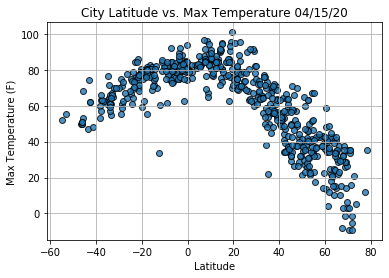

In [12]:
# add the time module "import time" (done in 1st cell)
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_Data/Fig1.png")

# Show plot
plt.show()

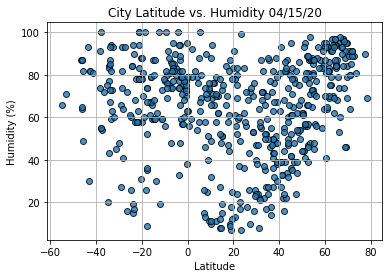

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Weather_Data/Fig2.png")
# Show plot
plt.show()

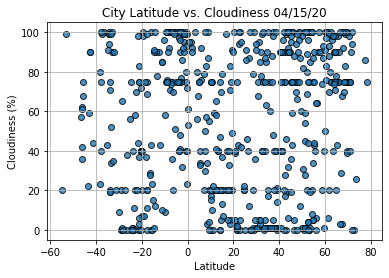

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Weather_Data/Fig3.png")
# Show plot
plt.show()

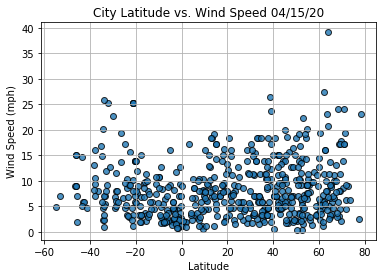

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Weather_Data/Fig4.png")
# Show plot
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data. 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

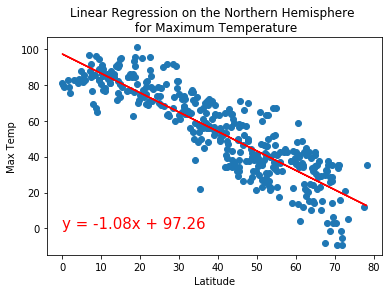

In [18]:
# Linear regression on the Northern Hemisphere - Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,0))

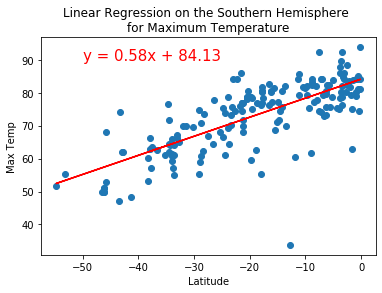

In [19]:
# Linear regression on the Southern Hemisphere - Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

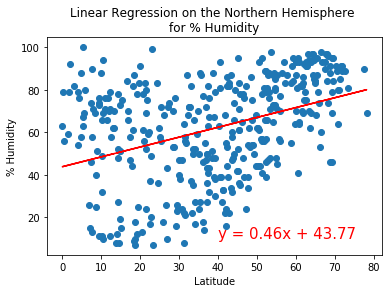

In [20]:
# Linear regression on the Northern Hemisphere - Humididty
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

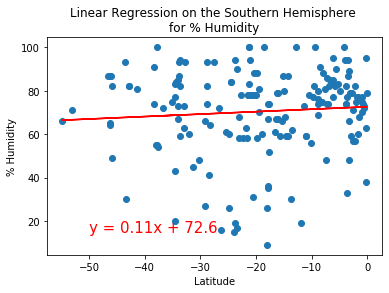

In [21]:
# Linear regression on the Southern Hemisphere - Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

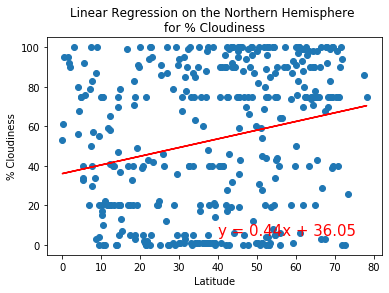

In [22]:
# Linear regression on the Northern Hemisphere - Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,5))

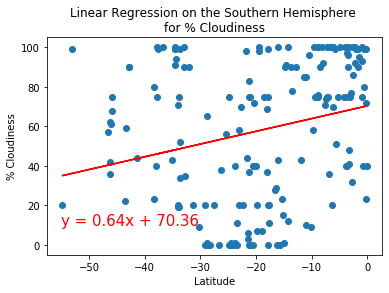

In [23]:
# Linear regression on the Southern Hemisphere - Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-55,10))

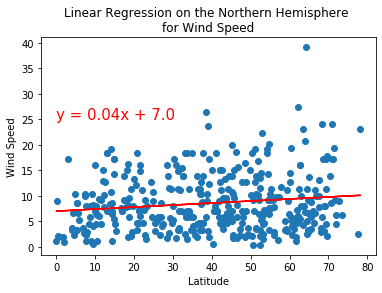

In [24]:
# Linear regression on the Northern Hemisphere - Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(0,25))

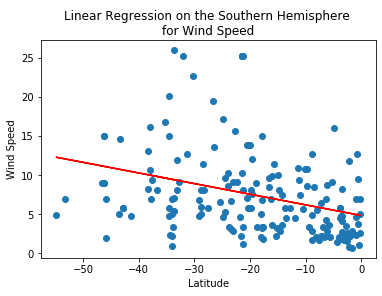

In [25]:
# Linear regression on the Southern Hemisphere - Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-55,30))